In [167]:
#homework for 03 Churn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

data = 'https://raw.githubusercontent.com/moonrayspex/machine-learning-dtzc-homework/refs/heads/main/03-churn/bank_full.csv'
df = pd.read_csv(data, sep=',', header=0) 



In [136]:
df.columns
df.head()
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [168]:
df = df[['age', 'job', 'marital', 'education','balance', 'housing',
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']].copy()

df.head()
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [169]:
df.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [170]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [139]:
#Question 1
mode_edu = df['education'].mode()[0]
mode_edu

'secondary'

In [93]:
#Question 2 - CORRELATION MATRIX
# https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp
# Create the correlation matrix for the numerical features of your dataset. 
# In a correlation matrix, you compute the correlation coefficient between every 
# pair of features.

# What are the two features that have the biggest correlation?

In [171]:
numeric = df[['age','balance','day', 'duration', 'campaign', 'pdays','previous']].copy()

#correlation matrix
#view correlation coefficients between features
corr_matrix = numeric.corr()
corr_matrix
#pdays and previous have highest corr- coeff-.

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [95]:
# Y = has the client subscribed a term deposit (Y/N)

In [172]:
# Target encoding - 
#     Now we want to encode the y variable.
#     replace the values yes/no with 1/0.

#housing ; y have YN values
#only replace y with 01 - inplace - 
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [173]:
# Split the data

#     Split your data in train/val/test sets with 60%/20%/20% distribution.
#     Use Scikit-Learn for that (the train_test_split function) section 3.3 and set the seed to 42.
# random_state is from scikit-learn; random.seed() is from random module in Py.
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

#df set - shuffled - it's nicer
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#bonkers!
df_test = df_test[:9042]

#y sets. using only the column y. 
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

#remove 'y' from df sets to avoid accidentally using it when bulidng model
del df_train['y']
del df_val['y']
del df_test['y']
#     Make sure that the target value y is not in your dataframe.

# y is still in df_full_train


In [174]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9042)

In [175]:
len(y_train), len(y_val), len(y_test)

(27126, 9042, 9042)

In [176]:
from sklearn.metrics import mutual_info_score

for f in df_full_train:
    mi = mutual_info_score(df_full_train.y, df_full_train[f])
    mi = round(mi, 2)
    print(f"{f}: {mi}")

age: 0.01
job: 0.01
marital: 0.0
education: 0.0
balance: 0.1
housing: 0.01
contact: 0.01
day: 0.01
month: 0.02
duration: 0.1
campaign: 0.0
pdays: 0.03
previous: 0.01
poutcome: 0.03
y: 0.36


In [177]:
# Question 3

#     Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
#     Round the scores to 2 decimals using round(score, 2).
from sklearn.metrics import mutual_info_score
def mutual_info_y_score(series):
    return mutual_info_score(series, df_full_train.y)

mi = df_full_train.apply(mutual_info_y_score)
mi.round(2).sort_values(ascending=False)

# remember y = if client has subsription to term deposit (YN)


y            0.36
duration     0.10
balance      0.10
poutcome     0.03
pdays        0.03
month        0.02
job          0.01
age          0.01
day          0.01
housing      0.01
contact      0.01
previous     0.01
marital      0.00
education    0.00
campaign     0.00
dtype: float64

In [154]:
numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [178]:
# Question 4

#     Now let's train a logistic regression.
#     Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
#bring in numberic set and categoric sets.
from sklearn.linear_model import LogisticRegression

# categoric = df_full_train[['job', 'marital', 'education','housing','contact','month', 'poutcome']]
# numeric = df_full_train[['age','balance','day', 'duration', 'campaign', 'pdays','previous']]
# ^^^ don't do it this way, results in NaNs when doing .to_dict()

categoric = ['job', 'marital', 'education','housing','contact','month', 'poutcome']
numeric = ['age','balance','day', 'duration', 'campaign', 'pdays','previous']

from sklearn.feature_extraction import DictVectorizer
#create DictVectorizer
dv = DictVectorizer(sparse=False)

# #resolve NaNs
# categoric = categoric.fillna(0)
# numeric = numeric.fillna(numeric.mean())

#get dictionaries
train_dict = df_train[categoric + numeric].to_dict(orient='records')
X_full_train = dv.fit_transform(train_dict)





In [179]:
train_dict


[{'job': 'technician',
  'marital': 'single',
  'education': 'tertiary',
  'housing': 'yes',
  'contact': 'cellular',
  'month': 'aug',
  'poutcome': 'unknown',
  'age': 32,
  'balance': 1100,
  'day': 11,
  'duration': 67,
  'campaign': 1,
  'pdays': -1,
  'previous': 0},
 {'job': 'entrepreneur',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'cellular',
  'month': 'nov',
  'poutcome': 'unknown',
  'age': 38,
  'balance': 0,
  'day': 17,
  'duration': 258,
  'campaign': 1,
  'pdays': -1,
  'previous': 0},
 {'job': 'blue-collar',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'cellular',
  'month': 'may',
  'poutcome': 'unknown',
  'age': 49,
  'balance': 3309,
  'day': 15,
  'duration': 349,
  'campaign': 2,
  'pdays': -1,
  'previous': 0},
 {'job': 'housemaid',
  'marital': 'married',
  'education': 'primary',
  'housing': 'no',
  'contact': 'cellular',
  'month': 'aug',
  'poutcome': 'unknown',
  'age': 37,


In [180]:

#get val dict
val_dict = df_val[categoric + numeric].to_dict(orient='records')
#get val matrix from dicts
X_val = dv.transform(val_dict)

#__________
# then we train a model on this feature matrix
y_train


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#NOTE - had to backtrack to find where renamed variables messed up carry-overs. 

In [181]:
len(X_full_train), len(y_train)

(27126, 27126)

In [185]:

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_full_train, y_train)
 
# do the same things for test data
dicts_test = df_test[categoric + numeric].to_dict(orient='records')
X_test = dv.transform(dicts_test)
 
# do the predictions
y_pred = model.predict_proba(X_test)[:, 1]
 
# compute accuracy
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()
#     Fit the model on the training dataset.
#         To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
#         model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
#     Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
(churn_decision == y_test).mean().round(2)

np.float64(0.9)

<!-- Question 5

    Let's find the least useful feature using the feature elimination technique.
    Train a model with all these features (using the same parameters as in Q4).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference? -->

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

categoric = ['job', 'marital', 'education','housing','contact','month', 'poutcome']
numeric = ['age','balance','day', 'duration', 'campaign', 'pdays','previous']

#create DictVectorizer
dv = DictVectorizer(sparse=False)

#get dictionaries
train_dict = df_train[categoric + numeric].to_dict(orient='records')
X_full_train = dv.fit_transform(train_dict)

#get val dict
val_dict = df_val[categoric + numeric].to_dict(orient='records')
#get val matrix from dicts
X_val = dv.transform(val_dict)

#__________
# then we train a model on this feature matrix
#     Fit the model on the training dataset.
y_train
#         To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
#         model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_full_train, y_train)
 
# do the same things for test data
dicts_test = df_test[categoric + numeric].to_dict(orient='records')
X_test = dv.transform(dicts_test)
 
# do the predictions
y_pred = model.predict_proba(X_test)[:, 1]
 #     Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
# compute accuracy
churn_decision = (y_pred >= 0.5)
#(churn_decision == y_test).mean()
(churn_decision == y_test).mean().round(2)

In [ ]:
#https://scikit-learn.org/stable/modules/permutation_importance.html

In [193]:
#Accuracy
len(y_val)
(y_val == churn_decision).sum()
((y_val == churn_decision).sum()) / (len(y_val))
#83% correct

(y_val == churn_decision).mean()
#same output as above. 

np.float64(0.8325591683255917)

In [194]:
#Evaluate the model on different thresholds
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [195]:
scores = []
 
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.118
0.05 0.526
0.10 0.678
0.15 0.732
0.20 0.761
0.25 0.782
0.30 0.796
0.35 0.808
0.40 0.818
0.45 0.826
0.50 0.833
0.55 0.840
0.60 0.844
0.65 0.848
0.70 0.854
0.75 0.858
0.80 0.863
0.85 0.868
0.90 0.873
0.95 0.877
1.00 0.882


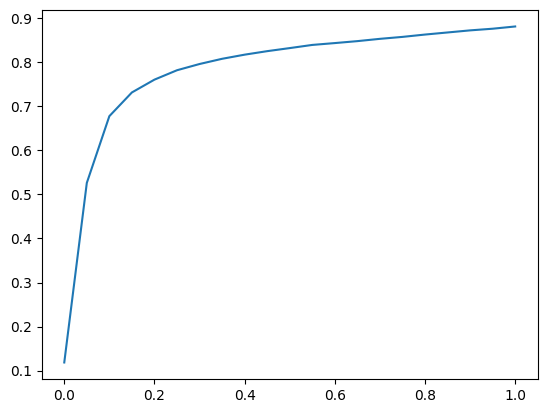

In [196]:
	
plt.plot(thresholds,scores)


In [197]:
#more compact way of doing the same above, but with accuracy_score
from sklearn.metrics import accuracy_score
 
thresholds = np.linspace(0, 1, 21)
scores = []
 
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.118
0.05 0.526
0.10 0.678
0.15 0.732
0.20 0.761
0.25 0.782
0.30 0.796
0.35 0.808
0.40 0.818
0.45 0.826
0.50 0.833
0.55 0.840
0.60 0.844
0.65 0.848
0.70 0.854
0.75 0.858
0.80 0.863
0.85 0.868
0.90 0.873
0.95 0.877
1.00 0.882


In [ ]:
# Question 6

#     Now let's train a regularized logistic regression.
#     Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
#     Train models using all the features as in Q4.
#     Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

# Which of these C leads to the best accuracy on the validation set?